**About Heart Disease**

Heart disease is a general term that means that the heart is not working normally. Babies can be born with heart disease. This is called congenital heart disease. If people get heart disease later, it is called acquired heart disease. Most heart disease is acquired.

The three most common types of acquired heart disease are:
* **Coronary Artery Disease (acronym CAD)** 
* **Congestive Heart Failure (CHF)**
* **Bad Heart Rhythms** 

**DEATHS**

Heart disease is the biggest killer of both men and women in the United States, England, Wales, and Canada. For example, heart disease causes 4 out of every 10 deaths in the United States.This is more than all kinds of cancer put together. Also, one person dies of heart disease about every minute in the United States alone.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


Loading the dataset

In [3]:
data=pd.read_csv("../input/heart.csv")

Going through the dataset, first impression

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Understanding what does these attributes resemble**
* **age**: Age of patient
* **sex**:Sex, 1 for male
* **cp**:chest pain
* **trestbps**:resting blood pressure,more than 120 over 80 and less than 140 over 90 (120/80-140/90): You have a normal blood pressure reading but it is a little higher than it should be, and you should try to lower it. Make healthy changes to your lifestyle.
* **chol**:serum cholesterol,shows the amount of triglycerides present. Triglycerides are another lipid that can be measured in the blood. 
* **fbs**:fasting blood sugar larger 120mg/dl (1 true),less than 100 mg/dL (5.6 mmol/L) is normal,100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes
* **rest**:ecg resting electrode.
* **thalach**:maximum heart rate achieved, maximum heart rate is 220 minus your age.
* **exan**:gexercise induced angina (1 yes),Angina is a type of chest pain caused by reduced blood flow to the heart.Angina is a symptom of coronary artery disease.
* **oldpeak**: ST depression induced by exercise relative to rest
* **slope**:slope of peak exercise ST
* **ca**:number of major vessel
* **thal**:no explanation provided, but probably thalassemia (3 normal; 6 fixed defect; 7 reversable defect)
* **result**:(1 anomality)	num	diagnosis of heart disease (angiographic disease status)

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
data.drop_duplicates(inplace=True)
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Male   : 206
Female : 96


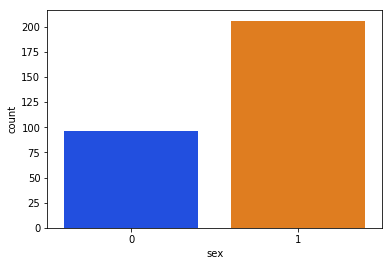

In [10]:
male=data.sex.value_counts()[1]
female=data.sex.value_counts()[0]
print("Male   :",male)
print("Female :", female)
sns.countplot(x="sex",data=data,palette="bright")
plt.show()

[]

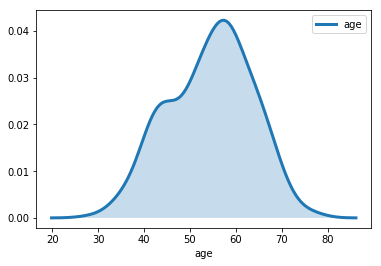

In [11]:
#What age people get heart disease
sns.distplot(data.age, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "age")
plt.plot()

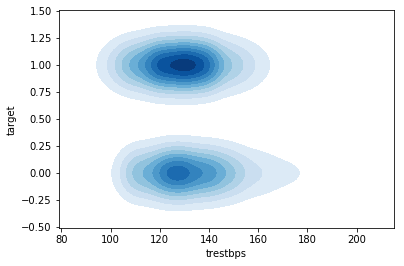

In [12]:
ax= sns.kdeplot(data.trestbps, data.target,cmap="Blues", shade=True, shade_lowest=False)


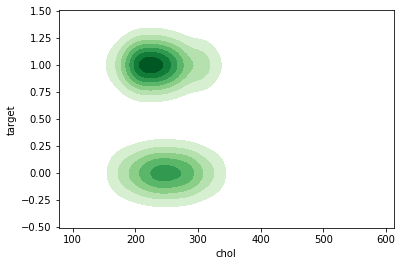

In [13]:
ax=sns.kdeplot(data.chol, data.target,cmap="Greens", shade=True, shade_lowest=False)

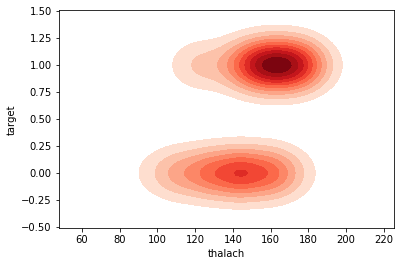

In [14]:
#fbs
ax=sns.kdeplot(data.thalach, data.target,cmap="Reds", shade=True, shade_lowest=False)

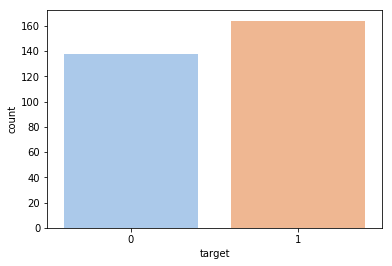

In [15]:
sns.countplot(x="target",data=data,palette="pastel")
plt.show()

In [16]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=20)


**The Model**

Using Random Forest and then using GridSearch CV to find the best parameter


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [20]:
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8360655737704918

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[1,500], 'max_depth':[1, 15]}
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train,Y_train)
print(clf.best_params_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 1, 'n_estimators': 500}


Using the parameter achieved from the GridSearch to 

In [22]:
model = RandomForestClassifier(n_estimators=500,max_depth=1)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
cm=confusion_matrix(Y_test.tolist(),Y_pred.tolist())
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision Score :",precision_score(Y_test,Y_pred))
print("f1 Score :",f1_score(Y_test,Y_pred))
print("Confusion Matrix: \n",cm)


Accuracy: 0.8852459016393442
Precision Score : 0.918918918918919
f1 Score : 0.9066666666666667
Confusion Matrix: 
 [[20  3]
 [ 4 34]]


In [23]:
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8333333333333334
Specificity :  0.918918918918919
